                                     CVXPY                                     
                                    v1.1.12                                    
(CVXPY) May 03 08:00:31 PM: Your problem has 5000 variables, 1 constraints, and 0 parameters.
(CVXPY) May 03 08:00:31 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 03 08:00:31 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 03 08:00:31 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 03 08:00:31 PM: Compiling problem (target solver=ECOS).
(CVXPY) May 03 08:00:31 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

/home/kamil/.local/lib/python3.8/site-packages/cvxpy/expressions/expression.py:556: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


(CVXPY) May 03 08:00:32 PM: Applying reduction ECOS
(CVXPY) May 03 08:00:34 PM: Finished problem compilation (took 2.066e+00 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) May 03 08:00:34 PM: Invoking solver ECOS  to obtain a solution.

ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +0.000e+00  -0.000e+00  +3e+03  1e-01  3e-06  1e+00  1e+03    ---    ---    1  1  - |  -  - 
 1  +1.944e-01  +3.336e-01  +5e+01  2e-03  5e-08  2e-01  2e+01  0.9825  1e-04   3  2  2 |  0  0
 2  +1.457e+01  +1.516e+01  +7e+00  3e-04  6e-09  6e-01  4e+00  0.8774  3e-02   4  5  5 |  0  0
 3  +2.173e+01  +2.176e+01  +2e-01  7e-06  7e-11  3e-02  1e-01  0.9890  2e-03  

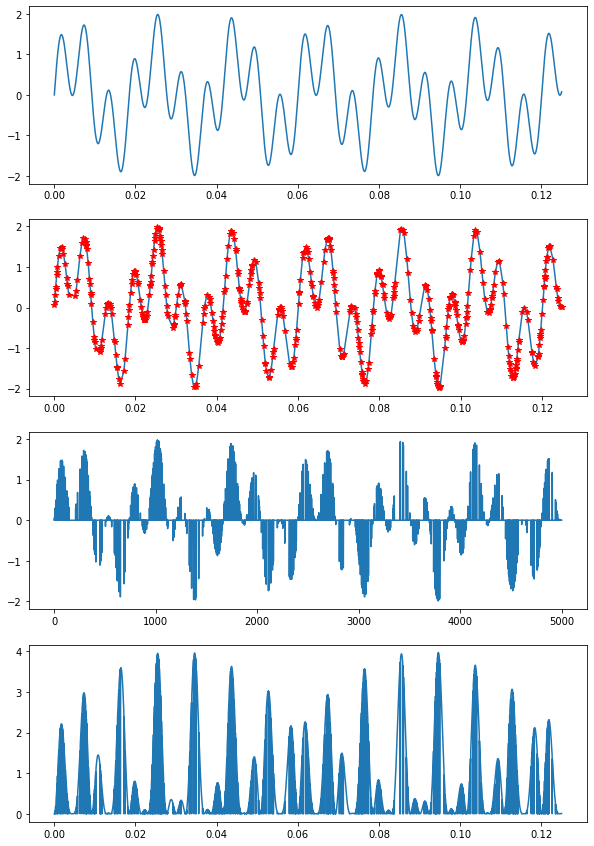

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft
from scipy import interpolate
import cvxpy as cvx

n = 5000
t = np.linspace(0, 1/8, n)
y = np.sin(100 * np.pi * t) + np.sin(333 * np.pi * t)

# x_samples = np.linspace(-1, 1, Nsamples)
# y_samples = R(x_samples)

plt.figure(figsize=(10,15))
plt.subplot(411)
plt.plot(t,y)

# Akwizycja danych 
m = 500 # - 10% probek
pr = np.random.choice(n, m, replace=False) # Losowanie próbek
pr.sort() # sortowanie do wyswietlania
t2 = t[pr]
b = y[pr]

plt.subplot(412)
plt.plot(t2,b)
plt.plot(t2,b, 'r*')

A = fft.idct(np.identity(n), norm='ortho', axis=0)
A = A[pr]

vx = cvx.Variable(n)
objective = cvx.Minimize(cvx.norm(vx, 2))
constraints = [A*vx == b]
prob = cvx.Problem(objective, constraints)
result = prob.solve(verbose=True)

x = np.array(vx.value)
x = np.squeeze(x)
f = fft.idct(x, norm='ortho', axis=0)

plt.subplot(413)
plt.plot(f)

plt.subplot(414)
error = (y-f)**2
average_error = sum(error)/len(error)

plt.plot(t, error)

